In [0]:
import keras
from keras.datasets import fashion_mnist


In [0]:
(tr_x, tr_y), (te_x, te_y) = fashion_mnist.load_data()

In [0]:
tr_x = tr_x.astype('float32')/255
te_x = te_x.astype('float32')/255

tr_x = tr_x.reshape(tr_x.shape[0], 28,28,1)
te_x = te_x.reshape(te_x.shape[0], 28,28,1)

In [90]:
tr_y = to_categorical(tr_y)
te_y = to_categorical(te_y)

y_tr.shape

(60000, 10)

In [0]:
from keras import models, layers

In [0]:
def build_model():
  model =  models.Sequential()
  
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
  model.add(layers.MaxPooling2D(2, 2))
  
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(2, 2))
  
  model.add(layers.Conv2D(128, (3, 3), activation='relu'))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
  
  return model

In [0]:
cnn_model = build_model()

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline


In [95]:
cnn_hist = cnn_model.fit(tr_x, tr_y, epochs=5, batch_size=64, validation_data=(te_x, te_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 202us/step - loss: 0.5011 - acc: 0.8154 - val_loss: 0.4236 - val_acc: 0.8424
Epoch 2/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.3037 - acc: 0.8896 - val_loss: 0.3285 - val_acc: 0.8870
Epoch 3/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.2572 - acc: 0.9056 - val_loss: 0.2762 - val_acc: 0.9007
Epoch 4/5
60000/60000 [==============================] - 11s 190us/step - loss: 0.2229 - acc: 0.9174 - val_loss: 0.2719 - val_acc: 0.9011
Epoch 5/5
60000/60000 [==============================] - 11s 191us/step - loss: 0.1982 - acc: 0.9265 - val_loss: 0.2723 - val_acc: 0.9069


In [0]:
cnn_hist = cnn_hist.history

In [0]:
def print_acc(hist):
    epochs = range(1, 6)
    plt.plot(epochs, hist['acc'], 'b', label='Training acc')
    plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

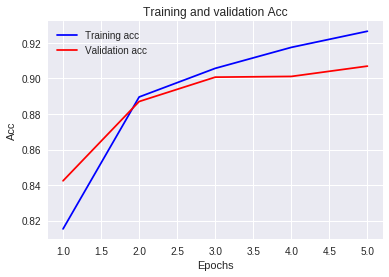

In [106]:
print_acc(cnn_hist)